# Curvas de Nível

Quando lidamos com funções de duas variáveis, uma ferramenta importante para entender o comportamento da função são as suas curvas de nível.

Seja $D\subseteq \mathbb{R}^2$. Dada uma função $f:D \to \mathbb{R}$, uma curva de nível de $f$ é dada por todos os pontos $(x,y)$ no domínio $D$ de $f$ cuja imagem por $f$ é $k$:
$$C_{k}=\{(x,y)\in D\subseteq {\mathbb{R}^{2}}:f(x,y)=k\}.$$
Assim, as curvas de nível são parametrizadas por $k$, e podem ser visualizadas através de um gráfico plano.

## Exemplo.

Considere a função
$$f(x,y) = x^2+y^2.$$
O gráfico desta função na região $[-5,5]\times [-5,5]$ é 

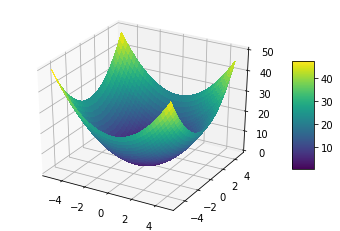

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2

surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis,
                       antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Suas curvas de nível podem ser vistas assim:

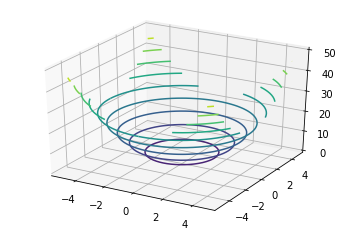

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cset = ax.contour(X, Y, Z, 10, cmap=cm.viridis)
plt.show()

Ou ainda, projetadas no plano $z=0$:

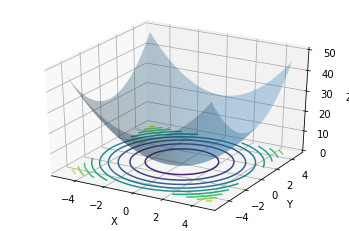

In [6]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.3)
cset = ax.contour(X, Y, Z, 10, zdir='z', offset=0, cmap=cm.viridis)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

Observe agora o gradiente dessa função calculado em diversos pontos. Sabemos que
$$\nabla f(x,y) = (2x, 2y) = 2(x,y).$$
Portanto, podemos calcular esse gradiente em qualquer ponto do domínio de $f$. Observe:

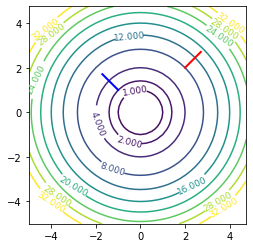

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
levels = [0, 1, 2, 4, 8, 12, 16, 20, 24, 28, 32]
cset = ax.contour(X, Y, Z, levels, cmap=cm.viridis)
ax.clabel(cset, fontsize=9, inline=1)
ax.set_aspect('equal')

# O gradiente de f em x=2, y=2 é o vetor (4,4):
grad = [4,4]
norma_grad = np.sqrt(grad[0]**2+grad[1]**2)
p = grad/norma_grad
plt.plot([2,2+p[0]], [2,2+p[1]], 'r-', linewidth=2)

# O gradiente de f em x=-1, y=1 é o vetor (-2,2):
grad = [-2,2]
norma_grad = np.sqrt(grad[0]**2+grad[1]**2)
p = grad/norma_grad
plt.plot([-1,-1+p[0]], [1,1+p[1]], 'b-', linewidth=2)

plt.show()

Observe: **O gradiente é perpendicular às curvas de nível da função.**

## Exemplo.

Considere a função *Rosenbrock* dada por
$$f(x,y)=(1-x)^2+10(y-x^2)^2.$$

In [11]:
def rosenbrock(x,y):
    return (1-x)**2+10*(y-x**2)**2

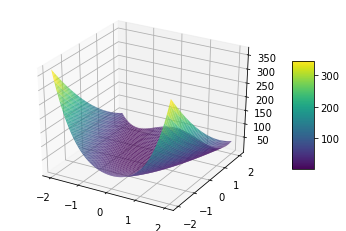

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
R = rosenbrock(X, Y)
surf = ax.plot_surface(X, Y, R, cmap=cm.viridis, alpha=0.8)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

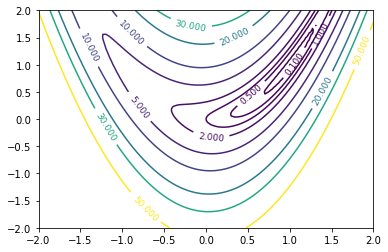

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
levels = [0, 0.1, 0.5, 1, 2, 5, 10, 20, 30, 50]
cset = ax.contour(X, Y, R, levels, cmap=cm.viridis)
ax.clabel(cset, fontsize=9, inline=1)
plt.show()

Mais uma vez, observe que o gradiente dessa função é dado por
$$\nabla f(x, y) = \left( 2+2x-40x(y-x^2), 20(y-x^2)\right).$$

In [16]:
from sympy import symbols, diff, evalf
x,y = symbols('x y')
expr = (1-x)**2+10*(y-x**2)**2
gradiente_rosenbrock = [diff(expr, x), diff(expr, y)]

Vamos calcular o gradiente de $f$ em alguns pontos:

In [17]:
grad = [expr.subs([(x, 0), (y, 0)]) for expr in gradiente_rosenbrock]
print(grad)

[-2, 0]


In [18]:
grad = [expr.subs([(x, -0.3), (y, -0.1)]) for expr in gradiente_rosenbrock]
print(grad)

[-4.88000000000000, -3.80000000000000]


In [19]:
grad = [expr.subs([(x, 1), (y, 1)]) for expr in gradiente_rosenbrock]
print(grad)

[0, 0]


Vejamos no gráfico:

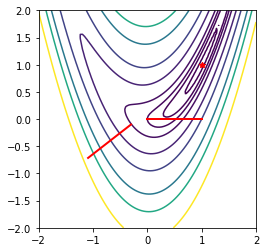

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
R = rosenbrock(X, Y)

levels = [0, 0.1, 0.5, 1, 2, 5, 10, 20, 30, 50]
cset = ax.contour(X, Y, R, levels, cmap=cm.viridis)

# O gradiente de f em x=0, y=0 é (2,0):
grad = [2,0]
norma_grad = np.sqrt(grad[0]**2+grad[1]**2)
p = grad/norma_grad
ax.plot([0,0+p[0]], [0,0+p[1]], 'r-', linewidth=2)

# O gradiente de f em x=-0.3, y=-0.1 é (-4.88,-3.8)
grad = [-4.88,-3.8]
norma_grad = np.sqrt(grad[0]**2+grad[1]**2)
p = grad/norma_grad
ax.plot([-0.3, -0.3+p[0]], [-0.1,-0.1+p[1]], 'r-', linewidth=2)

# O gradiente de f em x=1, y=1 é (0,0)
ax.plot([1,1], [1,1], 'r*', linewidth=2)

ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_aspect('equal')

plt.show()